<a href="https://colab.research.google.com/github/umeshrawat/MachineLearning/blob/master/Supervised_Regression/VolcanoEruption/src/Predict_Volcanic_Eruption.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Stage 1: Load the datasets from the source files.

In [5]:
#Open the code repo

!git clone https://github.com/umeshrawat/MachineLearning.git

Cloning into 'MachineLearning'...
remote: Enumerating objects: 278, done.
remote: Counting objects: 100% (278/278), done.
remote: Compressing objects: 100% (269/269), done.
remote: Total 278 (delta 33), reused 222 (delta 7), pack-reused 0
Receiving objects: 100% (278/278), 12.41 MiB | 6.02 MiB/s, done.
Resolving deltas: 100% (33/33), done.


In [6]:
import os
import pandas as pd
from matplotlib import pyplot as plt

def clear_contents(index, obs, list1, list2, dataFrame):
  index = 0
  obs = []
  list1 = []
  list2 = []
  dataFrame = dataFrame.iloc[0:0]
  return index, obs, list1, list2, dataFrame

def readDataSets():
  #os.chdir('/content/MachineLearning/Supervised_Regression/VolcanoEruption/Volcano_Dataset')
  # Specify the directory containing the subfolders and files
  root_folder_path = '/content/MachineLearning/Supervised_Regression/VolcanoEruption/Volcano_Dataset'
  observations = []
  index = 0
  array1 = []
  array2 = []
  dataFrames_list = []
  # Walk through the directory tree
  for subdir, dirs, files in os.walk(root_folder_path):
      for dir_file in files:
          file_path = os.path.join(subdir, dir_file)
          #print(file_path)
          if file_path.endswith('.txt'):
            with open(file_path, 'r') as file:
              for line in file:
                if line.strip():  # Ignore empty lines
                  index += 1
                  if index == 12:
                    array1 = line.split(',')
                  elif index == 13:
                    array2 = line.split(',')
                  else:
                    key, value = line.split(',', 1)
                    observations.append({key.strip(): value.strip()})

              # Display the parsed observations
              #for observation in observations:
                #print(observation)
              dataFrame = pd.DataFrame({'TimeSteps':array1,'Tilt_Value': array2})
              dataFrame[['TimeSteps','Tilt_Value']] = dataFrame[['TimeSteps','Tilt_Value']].astype(float)
              dataFrame.index = dataFrame.TimeSteps
              dataFrames_list.append(dataFrame)
              index, observations, array1, array2, dataFrame = clear_contents(index, observations, array1, array2, dataFrame)
              print(len(dataFrames_list))
              print('\n File 1:'+file_path+' completed.'  + '='*10 + '\n')  # Separator between files

  return dataFrames_list

In [7]:
dataFrames = readDataSets()

1

 File 1:/content/MachineLearning/Supervised_Regression/VolcanoEruption/Volcano_Dataset/Volcano9/observation8.txt completed.==========

2

 File 1:/content/MachineLearning/Supervised_Regression/VolcanoEruption/Volcano_Dataset/Volcano9/observation1.txt completed.==========

3

 File 1:/content/MachineLearning/Supervised_Regression/VolcanoEruption/Volcano_Dataset/Volcano9/observation7.txt completed.==========

4

 File 1:/content/MachineLearning/Supervised_Regression/VolcanoEruption/Volcano_Dataset/Volcano9/observation2.txt completed.==========

5

 File 1:/content/MachineLearning/Supervised_Regression/VolcanoEruption/Volcano_Dataset/Volcano9/observation12.txt completed.==========

6

 File 1:/content/MachineLearning/Supervised_Regression/VolcanoEruption/Volcano_Dataset/Volcano9/observation10.txt completed.==========

7

 File 1:/content/MachineLearning/Supervised_Regression/VolcanoEruption/Volcano_Dataset/Volcano9/observation5.txt completed.==========

8

 File 1:/content/MachineLearn

In [8]:
from pandas.plotting import autocorrelation_plot

def plot_the_dataframes(dataFrames):
  #print(dataFrames[188].describe())
  #fig_size = plt.rcParams["figure.figsize"] #Get current size
  #fig_size[0] = 13                         #Set figure width to 13 and height to 9
  #fig_size[1] = 9
  #plt.rcParams["figure.figsize"] = fig_size

  #autocorrelation_plot(dataFrames[5])
  #Data Exploration
  plt.figure(figsize=(16,7))
  #plt.ylim(min(dataFrames[5]['Tilt_Value']), max(dataFrames[5]['Tilt_Value']))
  #plt.xlim(min(dataFrames[5]['TimeSteps']), max(dataFrames[5]['TimeSteps']))
  fig = plt.figure(1)
  ax1 = fig.add_subplot(111)
  ax1.set_xlabel('TimeSteps')
  ax1.set_ylabel('Tilt_Value')
  ax1.plot(dataFrames[5]['TimeSteps'], dataFrames[5]['Tilt_Value'])

Stage 2: EDA:

1. Visualize the data frames to undestand the data and patterns - Seasonality and Trends.
2. Perform Stationarity check and measure using plot and Duckey Fuller Test.

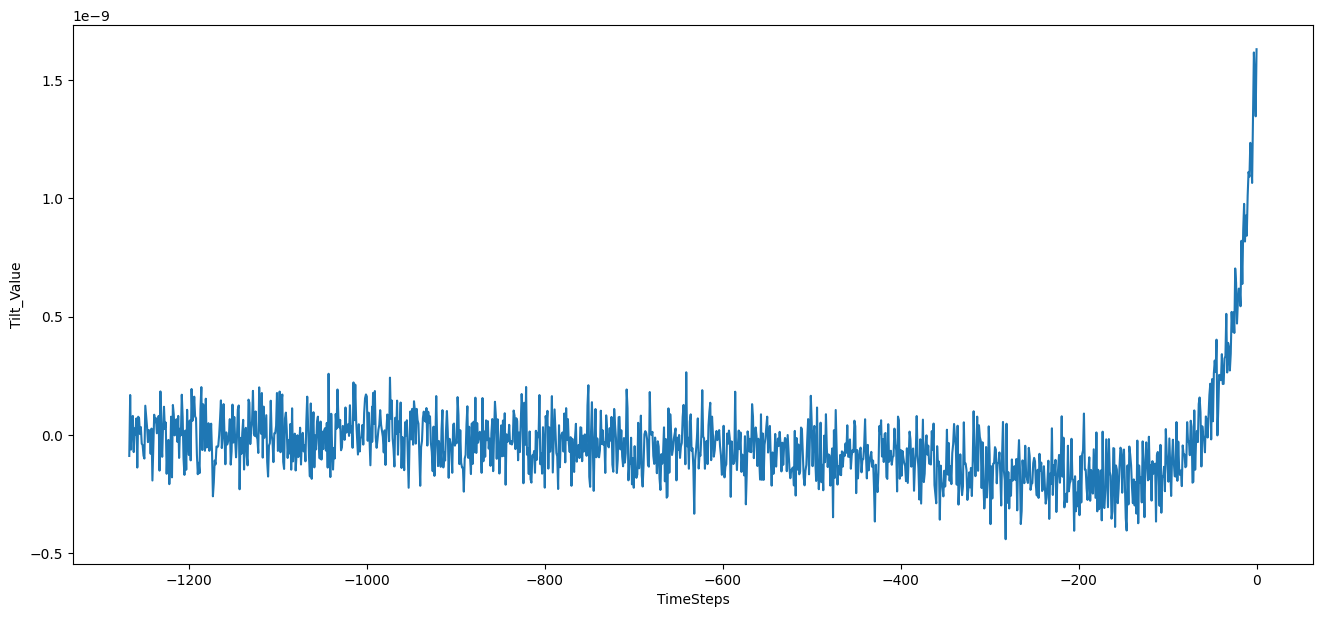

In [9]:
plot_the_dataframes(dataFrames)

In [10]:
dataFrames[5].describe()

,TimeSteps,Tilt_Value
count,1269.000000,1.269000e+03
mean,-633.784082,-3.465311e-11
std,366.179821,1.966905e-10
min,-1267.000000,-4.408238e-10
25%,-951.000000,-1.370385e-10
50%,-634.000000,-5.393445e-11
75%,-317.000000,3.189794e-11
max,0.000000,1.629548e-09


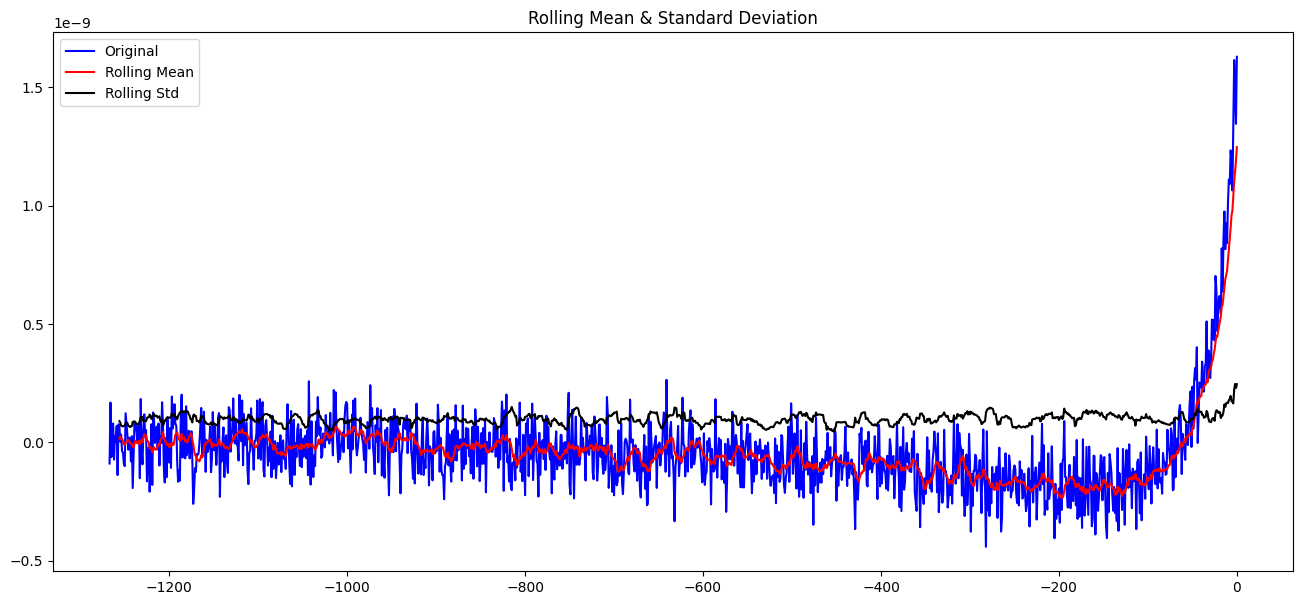

In [16]:
# Determine Rolling Statistics
rollMean = dataFrames[5].Tilt_Value.rolling(12).mean()
rollStd = dataFrames[5].Tilt_Value.rolling(12).std()

plt.figure(figsize=(16,7))
fig = plt.figure(1)

#Plot rolling statistics:
orig = plt.plot(dataFrames[5].Tilt_Value, color='blue',label='Original')
mean = plt.plot(rollMean, color='red', label='Rolling Mean')
std = plt.plot(rollStd, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

Above plot shows Rolling Standard Deviation is not constant over period of time,
while Rolling Mean is relatively constant.

--> This means that this series is not a Stationary series.
We will take a Log transformation first to make the stationary.

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


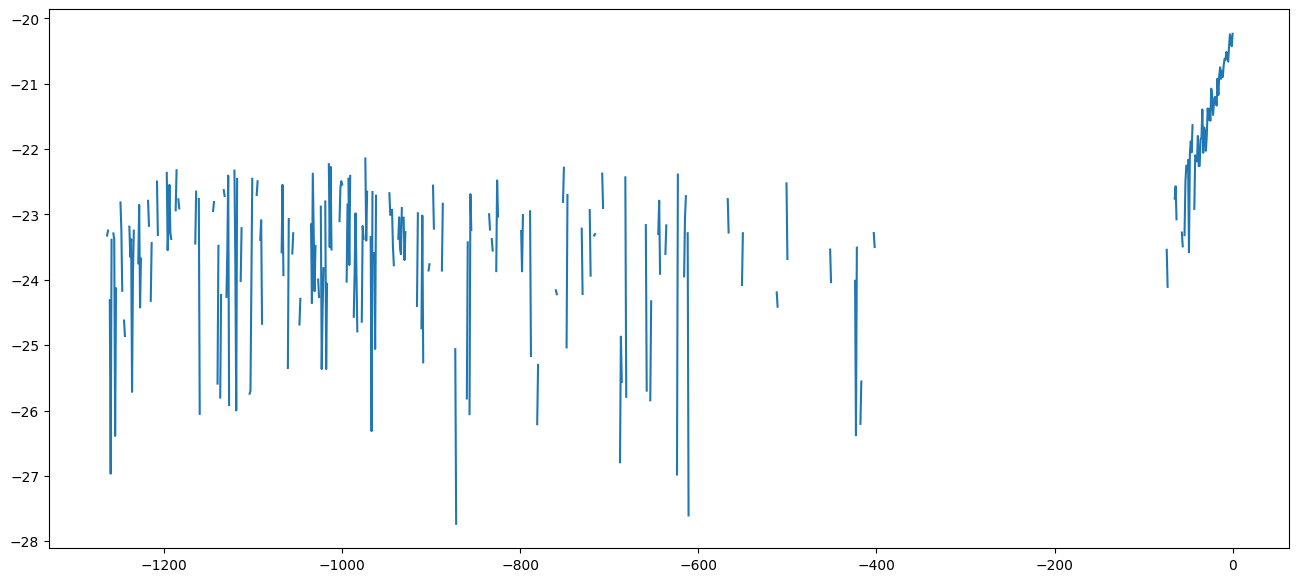

In [17]:
#Lets try transformation
plt.figure(figsize=(16,7))
fig = plt.figure(1)

import numpy as np
ts_log = np.log(dataFrames[5].Tilt_Value)
plt.plot(ts_log)

In [18]:
ts_log.info()

<class 'pandas.core.series.Series'>
Index: 1269 entries, -1267.0 to 0.0
Series name: Tilt_Value
Non-Null Count  Dtype  
--------------  -----  
421 non-null    float64
dtypes: float64(1)
memory usage: 19.8 KB


Well, the above plot shows the time series is still not Stationary.

To understand this clearly, we will decompose this log transformed time series and check for Trend, Seasonality measures.


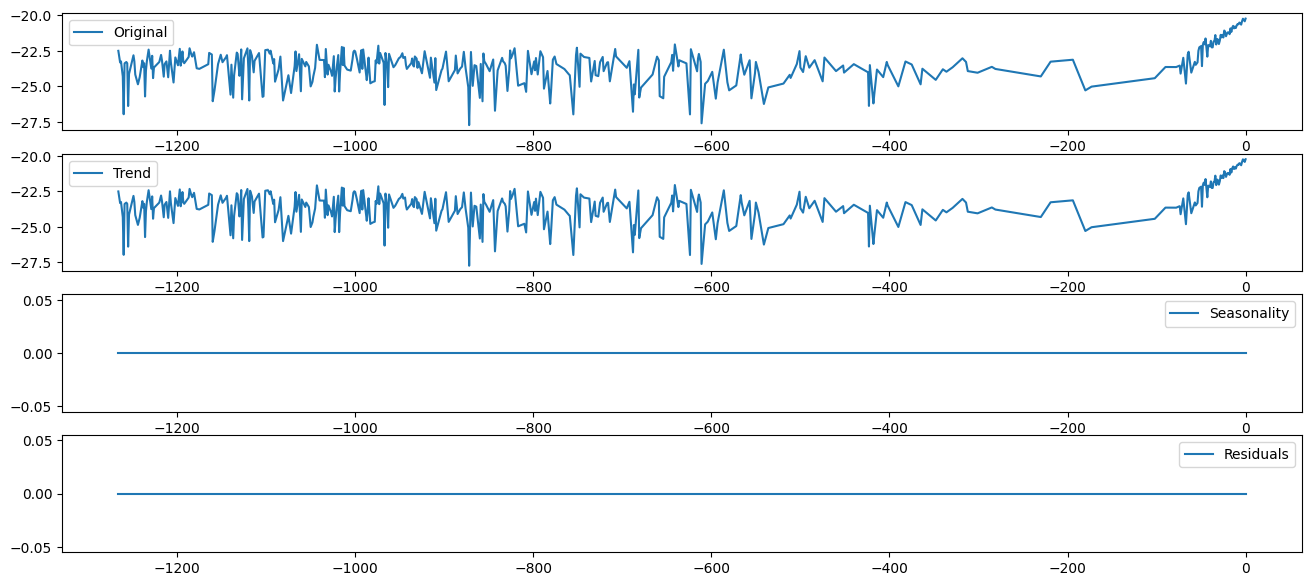

In [19]:
#Decomposition
from statsmodels.tsa.seasonal import seasonal_decompose
ts_log.dropna(inplace=True)
decomposition = seasonal_decompose(ts_log,period=1,model = 'additive')

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(16,7))
fig = plt.figure(1)

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')

From above plot, it is evident that the Trend component is contributing more to the Time Series.

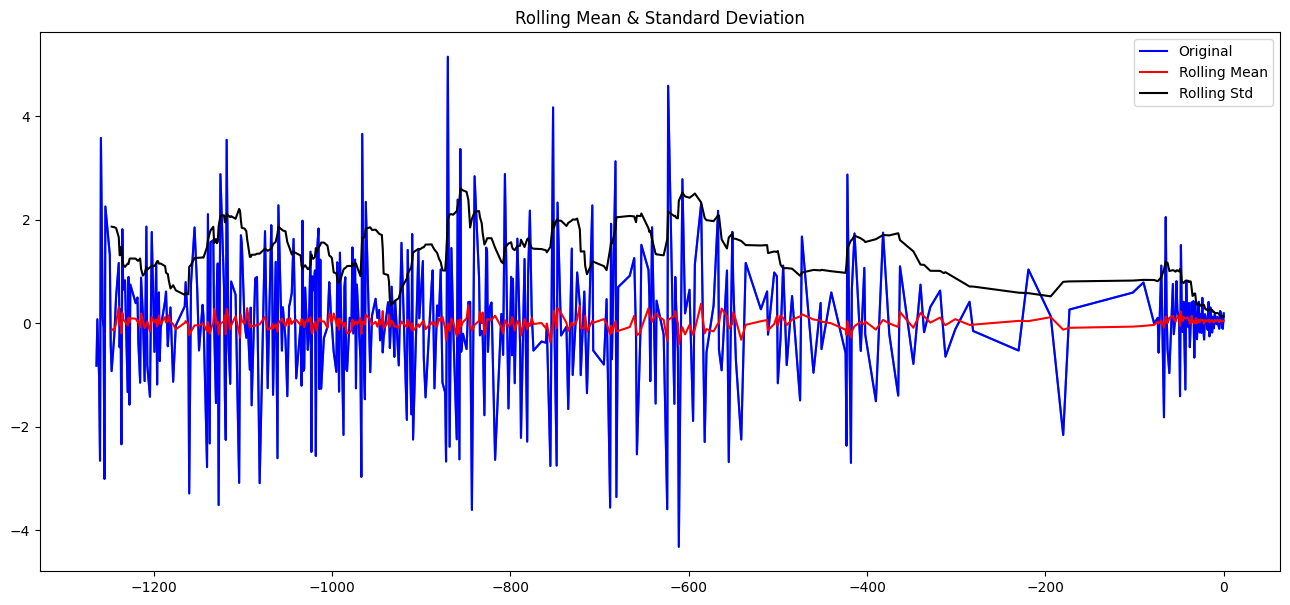

In [20]:
import matplotlib.pyplot as plt

#Lets try differencing
plt.figure(figsize=(16,7))
fig = plt.figure(1)
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)

#Determing rolling statistics
rolLmean = ts_log_diff.rolling(12).mean()
rolLstd = ts_log_diff.rolling(12).std()




#Plot rolling statistics:
orig = plt.plot(ts_log_diff, color='blue',label='Original')
mean = plt.plot(rolLmean, color='red', label='Rolling Mean')
std = plt.plot(rolLstd, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

Now, from the above plot, there is no upward pattern in mean or in Standard Deviation.

Now, this Time Series is a Stationary Time Series as it has constant mean,
and constant Standard Deviation.

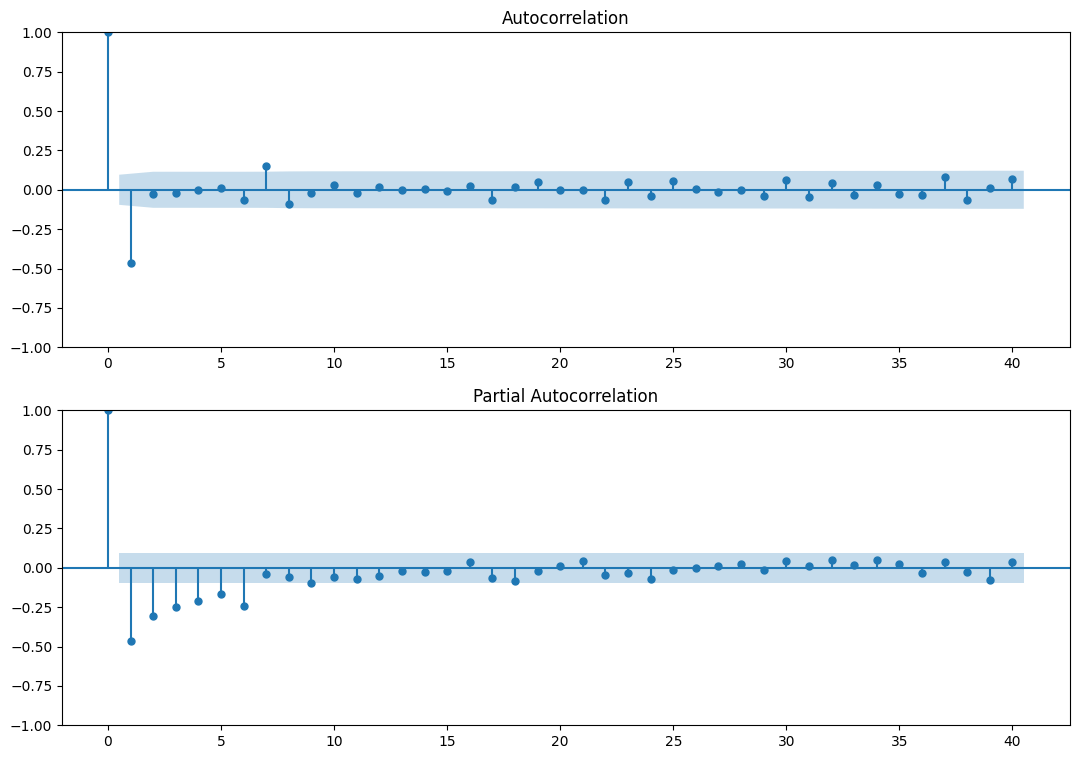

In [23]:
#Now, plot ACF and PACF chart for the differenced time series
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(ts_log_diff, nlags=20)
lag_pacf = pacf(ts_log_diff, nlags=20)

import statsmodels.api as sm
fig = plt.figure(figsize=(13,9))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(ts_log_diff.dropna(),lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(ts_log_diff.dropna(),lags=40,ax=ax2)

The above charts are used to decide the parameters for the ARIMA model.

From above plot,

The first line that crosses the chart (Confidence Interval) is the order of AR (Auto regression) from the AutoCorrelation Chart = 1.
and the order of MA is also 1, from the chart of Partial AutoCorrelation (PAC).
and D = 0.



Stage 3: Modelling Algorithm #1: ARIMA.

In [36]:
!pip install statsmodels

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


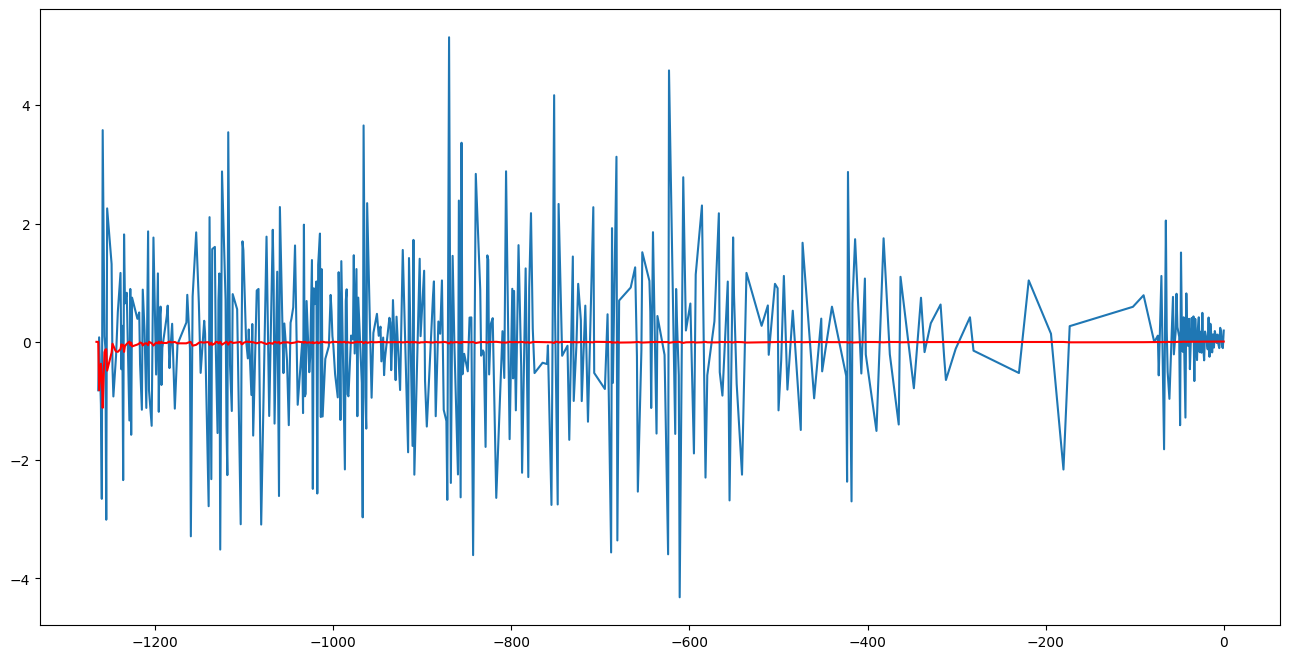

In [55]:
from statsmodels.tsa.arima.model import ARIMA
plt.figure(figsize=(16,8))
#ts_log_diff.dropna(inplace=True)
model = ARIMA(ts_log_diff, order=(0,1,1))
results_ARIMA = model.fit()
plt.plot(ts_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')

Taking results back to original scale

In [56]:
ARIMA_diff_predictions = pd.Series(results_ARIMA.fittedvalues, copy=True)
print(ARIMA_diff_predictions.head())

TimeSteps
-1266.0    0.000000
-1264.0    0.000000
-1263.0   -0.818953
-1261.0   -0.371177
-1260.0   -0.602674
dtype: float64


In [57]:
ARIMA_diff_predictions_cumsum = ARIMA_diff_predictions.cumsum()
print(ARIMA_diff_predictions_cumsum.head())

TimeSteps
-1266.0    0.000000
-1264.0    0.000000
-1263.0   -0.818953
-1261.0   -1.190130
-1260.0   -1.792804
dtype: float64


In [58]:
ARIMA_log_prediction = pd.Series(ts_log.iloc[0], index=ts_log.index)
ARIMA_log_prediction = ARIMA_log_prediction.add(ARIMA_diff_predictions_cumsum,fill_value=0)
ARIMA_log_prediction.head()

TimeSteps
-1266.0   -22.503716
-1264.0   -22.503716
-1263.0   -23.322669
-1261.0   -23.693846
-1260.0   -24.296520
dtype: float64

Text(0.5, 1.0, 'RMSE: nan')

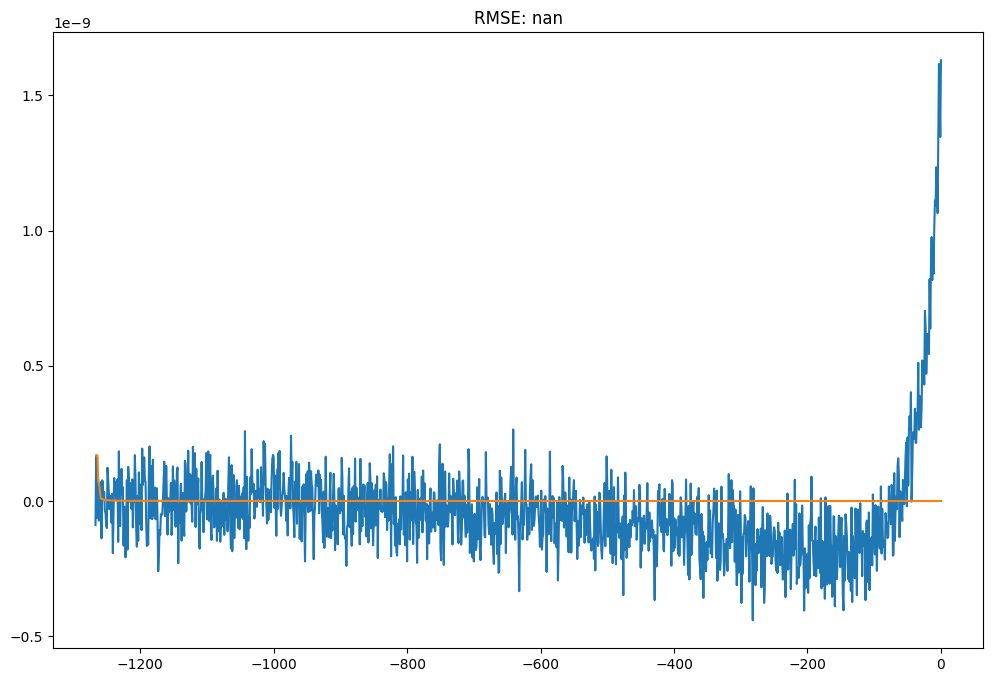

In [59]:
plt.figure(figsize=(12,8))
predictions_ARIMA = np.exp(ARIMA_log_prediction)
plt.plot(dataFrames[5].Tilt_Value)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-dataFrames[5].Tilt_Value)**2)/len(dataFrames[5])))

In [50]:
results_ARIMA.predict(10,20)

TimeSteps
-1249.0   -0.868034
-1248.0   -1.561614
-1247.0   -0.883168
-1245.0   -0.036542
-1244.0    0.266408
-1242.0    0.322765
-1239.0   -0.169133
-1238.0   -1.035584
-1237.0   -0.523409
-1236.0   -0.623133
-1235.0    1.254966
Name: predicted_mean, dtype: float64

In [53]:
import pmdarima as pm
def arimamodel(timeseries):
    automodel = pm.auto_arima(timeseries,
                              start_p=3,
                              start_q=3,
                              max_p=5,
                              max_q=5,
                              test="adf",
                              seasonal=True,
                              trace=True)
    return automodel

In [54]:
arimamodel(ts_log)

Performing stepwise search to minimize aic
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=1225.544, Time=5.66 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1459.002, Time=0.12 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1358.770, Time=0.14 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1224.898, Time=0.44 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1457.008, Time=0.07 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1226.686, Time=0.46 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1226.667, Time=0.70 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1227.995, Time=1.80 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=1224.907, Time=0.13 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0] intercept
Total fit time: 9.587 seconds


ARIMA(order=(0, 1, 1), scoring_args={}, suppress_warnings=True)

In [ ]:
# Split the dataset to training, test and predict.
from sklearn.metrics import mean_squared_error
from math import sqrt

# split into train and test sets
X = dataFrames[5].values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
df = pd.DataFrame([x for x in train])
df.columns = ['TimeSteps','Tilt_Value']
df[['TimeSteps','Tilt_Value']] = df[['TimeSteps','Tilt_Value']].astype(float)
predictions = list()
# walk-forward validation
for t in range(len(test)):
 print(df.shape)
 model = ARIMA(df['1'], order=(5,1,0))
 model_fit = model.fit()
 output = model_fit.forecast()
 yhat = output[0]
 predictions.append(yhat)
 obs = test[t]
 history.append(obs)
 print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

(891, 2)


KeyError: '1'